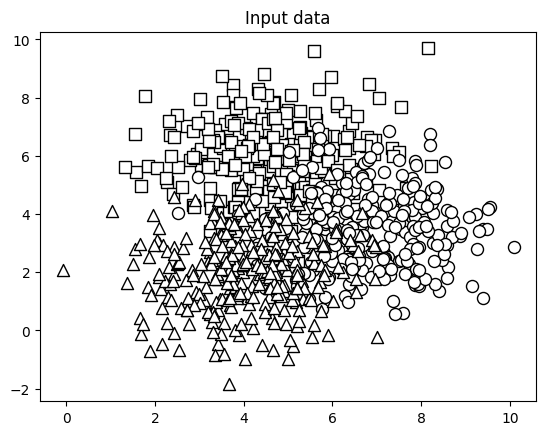

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.metrics import classification_report 
%matplotlib inline
%run utilities.ipynb

input_file = 'data_random_forests.txt' 
data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1] 

class_0 = np.array(X[y==0]) 
class_1 = np.array(X[y==1]) 
class_2 = np.array(X[y==2]) 

plt.figure() 
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', 
            edgecolors='black', linewidth=1, marker='s') 
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
            edgecolors='black', linewidth=1, marker='o') 
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', 
            edgecolors='black', linewidth=1, marker='^') 
plt.title('Input data') 
plt.show()

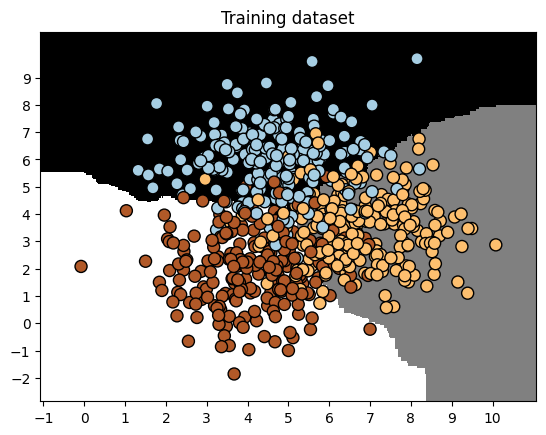

In [2]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( 
            X, y, test_size=0.25, random_state=5) 

params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0} 

# classifier = RandomForestClassifier(**params) 
classifier = ExtraTreesClassifier(**params) 
        
classifier.fit(X_train, y_train) 
visualize_classifier(classifier, X_train, y_train, 'Training dataset') 

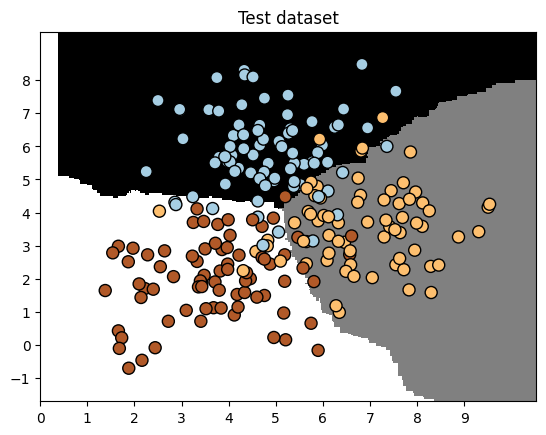

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.89      0.83      0.86       221
     Class-1       0.82      0.84      0.83       230
     Class-2       0.83      0.86      0.85       224

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675


Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.84      0.84      0.84        70
     Class-2       0.85      0.92      0.89        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



In [3]:
y_test_pred = classifier.predict(X_test) 
visualize_classifier(classifier, X_test, y_test, 'Test dataset')
class_names = ['Class-0', 'Class-1', 'Class-2'] 

print("Classifier performance on training dataset\n") 
print(classification_report(y_train, classifier.predict(X_train), 
                            target_names=class_names)) 

print("\nClassifier performance on test dataset\n") 
print(classification_report(y_test, y_test_pred, target_names=class_names)) 

Confidence measure:

Datapoint: [5 5]
Probablilities: [0.49 0.28 0.23]
Predicted class: Class-0

Datapoint: [3 6]
Probablilities: [0.67 0.12 0.21]
Predicted class: Class-0

Datapoint: [6 4]
Probablilities: [0.26 0.5  0.25]
Predicted class: Class-1

Datapoint: [7 2]
Probablilities: [0.11 0.62 0.27]
Predicted class: Class-1

Datapoint: [4 4]
Probablilities: [0.33 0.21 0.45]
Predicted class: Class-2

Datapoint: [5 2]
Probablilities: [0.19 0.29 0.53]
Predicted class: Class-2


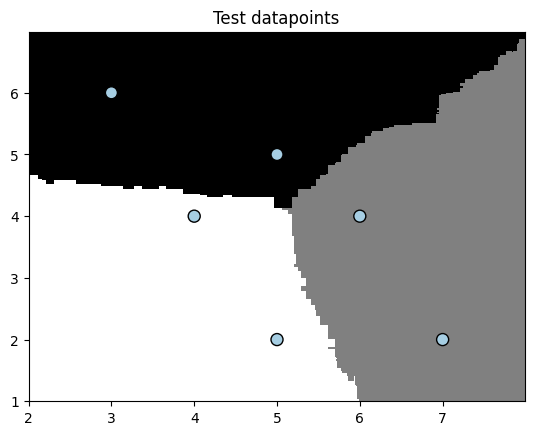

In [4]:
np.set_printoptions(precision=2)

test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

print("Confidence measure:") 
for datapoint in test_datapoints: 
    probabilities = classifier.predict_proba([datapoint])[0] 
    predicted_class = 'Class-' + str(np.argmax(probabilities)) 
    print('\nDatapoint:', datapoint)
    print('Probablilities:', probabilities) 
    print('Predicted class:', predicted_class) 

visualize_classifier(classifier, test_datapoints, 
                     [0]*len(test_datapoints), 
                     'Test datapoints') 